## Шаг 1:
### Изучение общей информации.

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В моем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
calls_data = pd.read_csv('/datasets/calls.csv')
internet_data = pd.read_csv('/datasets/internet.csv')
messages_data = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users_data = pd.read_csv('/datasets/users.csv')

In [3]:
print(calls_data.info())
calls_data.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [4]:
print(internet_data.info())
internet_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB
None


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


In [5]:
print(messages_data.info())
messages_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [6]:
print(tariffs.info())
tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
print(users_data.info())
users_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


### Вывод

Все таблицы выведены и изучены.

## Шаг 2:

### Предобработка данных

#### Приведем все даты в таблицах к типу  datetime

In [8]:
def to_datetime_func(data, column):
    data[column] = pd.to_datetime(data[column], format='%Y-%m-%d')
    
# Сделаем функцию, которая приводит входящий столбец к типу данных datetime

to_datetime_func(calls_data, 'call_date')
to_datetime_func(internet_data, 'session_date')
to_datetime_func(messages_data, 'message_date')
to_datetime_func(users_data, 'churn_date')
to_datetime_func(users_data, 'reg_date')

# переведем все столбцы с датами к типу данных datetime

users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


#### Найдем ошибки в данных

In [9]:
print(calls_data.query('duration == 0.01').count())
print()
print(calls_data.query('duration == 0.00').count())

id           101
call_date    101
duration     101
user_id      101
dtype: int64

id           39613
call_date    39613
duration     39613
user_id      39613
dtype: int64


In [10]:
calls_data_clear = calls_data.query('duration != 0.00').reset_index(drop=True)
calls_data_clear

,id,call_date,duration,user_id
0,1000_2,2018-06-11,2.85,1000
1,1000_3,2018-09-21,13.80,1000
2,1000_4,2018-12-15,5.18,1000
3,1000_7,2018-08-22,18.31,1000
4,1000_8,2018-09-15,18.44,1000
...,...,...,...,...
162989,1499_215,2018-12-26,0.76,1499
162990,1499_216,2018-10-18,18.83,1499
162991,1499_217,2018-11-10,10.81,1499
162992,1499_218,2018-10-06,4.27,1499


В таблице звонков мы имеем 39.5 тыс. вызовов с нулевой продолжительностью. Это не ошибка передачи данных, так как звонки с продолжительностью 0.01 мин. регистрируются системой.
Наиболее вероятно, что это записи звонков, в которых не получилось дозвониться (Занято, абонент не доступен и тд.).

Так как эти звонки не влияют на расход минут, можем от них избавиться.

In [11]:
calls_data_clear['duration'] = calls_data_clear['duration'].apply(np.ceil).astype('int')
calls_data_clear.head(10)

,id,call_date,duration,user_id
0,1000_2,2018-06-11,3,1000
1,1000_3,2018-09-21,14,1000
2,1000_4,2018-12-15,6,1000
3,1000_7,2018-08-22,19,1000
4,1000_8,2018-09-15,19,1000
5,1000_10,2018-08-22,6,1000
6,1000_11,2018-05-28,19,1000
7,1000_12,2018-07-05,3,1000
8,1000_13,2018-09-29,8,1000
9,1000_14,2018-12-11,10,1000


In [12]:
internet_data['mb_used'] = internet_data['mb_used'].apply(np.ceil).astype('int')
internet_data.head(10)

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000
5,1000_5,400,2018-10-02,1000
6,1000_6,541,2018-09-07,1000
7,1000_7,416,2018-07-11,1000
8,1000_8,506,2018-10-08,1000
9,1000_9,346,2018-09-03,1000


Округляем количество количество минут и мегабайт трафика до целого значения, в большую сторону.

### Вывод

Предобработка данных проведена. Сделана следующие изменения с данными:

1. Даты во всех таблицах приведены к типу datetime.

2. Удалены значения с нулевой продолжительностью звонков. Эти звонки не влияют на расход минут. 
   С большой вероятностью, данный значения появились, при неотвеченом вызове или недозвоне.
    
3. Количество минут и трафика округлили в большую сторону до целого числа. Это сделано, потому что оператор окруляет вверх значения минут и мегабайт.

## Шаг 3:

#### Посчитаем для каждого пользователя:
- количество звонком и и минут по месяцам
- количество сообщений по месяцам
- объем интернет-трафика по месяцам
- помесечную выручку.

In [13]:
calls_data_clear['month'] = pd.DatetimeIndex(calls_data_clear['call_date']).month
minutes_by_month = calls_data_clear.pivot_table(index='user_id', columns = 'month', values='duration', aggfunc='sum')
minutes_by_month = minutes_by_month.fillna(0).astype('int')
print('Количество минут по месяцам для каждого пользователя')
minutes_by_month

Количество минут по месяцам для каждого пользователя


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,159,172,340,408,466,350,338,333
1001,0,0,0,0,0,0,0,0,0,0,430,414
1002,0,0,0,0,0,117,214,289,206,212,243,236
1003,0,0,0,0,0,0,0,380,961,855,824,802
1004,0,0,0,0,35,171,135,137,117,145,117,130
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,92,813,1030,954,1031
1496,48,594,557,521,484,555,582,527,486,450,662,518
1497,0,0,0,0,0,0,0,0,0,490,371,545


In [14]:
calls_data_clear['month'] = pd.DatetimeIndex(calls_data_clear['call_date']).month
calls_by_month = calls_data_clear.pivot_table(index='user_id', columns = 'month', values='duration', aggfunc='count')
calls_by_month = calls_by_month.fillna(0).astype('int')
print('Количество звонков по месяцам для каждого пользователя')
calls_by_month

Количество звонков по месяцам для каждого пользователя


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,17,28,41,42,46,44,37,38
1001,0,0,0,0,0,0,0,0,0,0,45,47
1002,0,0,0,0,0,14,21,37,25,24,25,27
1003,0,0,0,0,0,0,0,43,105,97,95,88
1004,0,0,0,0,7,25,20,18,18,21,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,13,95,126,112,120
1496,6,65,67,52,50,57,63,62,58,56,66,65
1497,0,0,0,0,0,0,0,0,0,50,48,58


In [15]:
messages_data['month'] = pd.DatetimeIndex(messages_data['message_date']).month
messages_by_month = messages_data.pivot_table(index='user_id', columns = 'month', values='id', aggfunc='count')
messages_by_month = messages_by_month.fillna(0).astype('int')
print('Количество отправленных сообщений по месяцам для каждого пользователя')
messages_by_month

Количество отправленных сообщений по месяцам для каждого пользователя


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,22,60,75,81,57,73,58,70
1002,0,0,0,0,0,4,11,13,4,10,16,12
1003,0,0,0,0,0,0,0,37,91,83,94,75
1004,0,0,0,0,95,134,181,151,146,165,158,162
1005,7,38,56,41,42,47,56,64,52,44,51,54
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,13,82,82,79,84
1496,9,45,46,49,40,35,42,41,29,35,46,51
1497,0,0,0,0,0,0,0,0,0,20,14,17


In [16]:
internet_data['month'] = pd.DatetimeIndex(internet_data['session_date']).month
internet_by_month = internet_data.pivot_table(index='user_id', columns = 'month', values='mb_used', aggfunc='sum')
internet_by_month = internet_by_month.fillna(0).astype('int')
print('Объем интернет-трафика по месяцам для каждого пользователя')
internet_by_month

Объем интернет-трафика по месяцам для каждого пользователя


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,2256,23257,14016,14070,14581,14717,14768,9827
1001,0,0,0,0,0,0,0,0,0,0,18452,14053
1002,0,0,0,0,0,10871,17601,20347,16712,13905,18610,18137
1003,0,0,0,0,0,0,0,8571,12479,14779,11368,10132
1004,0,0,0,0,13415,17619,22243,28607,15125,18494,15631,18038
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,2616,33105,29393,38972,23450
1496,3766,28523,24990,21098,23740,20163,24395,23560,26970,28215,25092,20757
1497,0,0,0,0,0,0,0,0,0,11512,14174,19940


### Помесечная выручка

#### Создадим функцию для расчета выручки

In [17]:
tariffs_d = {'smart': {'tariff_name': 'smart',
                         'month_fee': 550,
                         'minutes_included': 500,
                         'messeges_included': 50,
                         'mb_included': 15360,
                         'rub_per_minut': 3,
                         'rub_per_message': 3,
                         'rub_per_gb': 200},
                'ultra':{'tariff_name': 'ultra',
                         'month_fee': 1950,
                         'minutes_included': 3000,
                         'messeges_included': 1000,
                         'mb_included': 30720,
                         'rub_per_minut': 1,
                         'rub_per_message': 1,
                         'rub_per_gb': 150}}



def revenue_func(data, key):
    revenue = tariffs_d[key]['month_fee']
    if data['calls_sum'] > tariffs_d[key]['minutes_included']:
        revenue += (data['calls_sum'] - tariffs_d[key]['minutes_included']) * tariffs_d[key]['rub_per_minut']
        return revenue
    elif data['messages_count'] > tariffs_d[key]['messeges_included']:
        revenue += (data['messages_count'] - tariffs_d[key]['messeges_included']) * tariffs_d[key]['rub_per_message']
        return revenue
    elif data['mb_used'] > tariffs_d[key]['mb_included']:
        revenue += (math.ceil((data['mb_used'] - tariffs_d[key]['mb_included']) / 1024)) * tariffs_d[key]['rub_per_gb']
        return revenue
    else:
        return revenue

Для тарифа ультра

In [18]:
# сумма минут
calls_tariff_ultra = (calls_data_clear.merge(users_data, on='user_id', how='left')
                                      .query('tariff == "ultra"')
                                      .pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum')
                     )    
calls_tariff_ultra = calls_tariff_ultra.fillna(0).astype('int')
calls_tariff_ultra.reset_index(inplace=True)
calls_tariff_ultra.columns = ['user_id', 'month', 'calls_sum']


# сумма сообщений
messages_tariff_ultra = (messages_data.merge(users_data, on='user_id', how='left')
                                      .query('tariff == "ultra"')
                                      .pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
                        )
messages_tariff_ultra = messages_tariff_ultra.fillna(0).astype('int')
messages_tariff_ultra.reset_index(inplace=True)
messages_tariff_ultra.columns = ['user_id', 'month', 'messages_count']


# объем трафика
internet_tariff_ultra = (internet_data.merge(users_data, on='user_id', how='left')
                                      .query('tariff == "ultra"')
                                      .pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
                                                        )
internet_tariff_ultra = internet_tariff_ultra.fillna(0).astype('int')
internet_tariff_ultra.reset_index(inplace=True)
internet_tariff_ultra.columns = ['user_id', 'month', 'mb_used']




user_ultra_income = calls_tariff_ultra.merge(messages_tariff_ultra, on=['user_id', 'month'], how='left')
user_ultra_income = (user_ultra_income.merge(internet_tariff_ultra, on=['user_id', 'month'], how='left')
                                      .fillna(0)
                                      .astype('int')
                    )

In [19]:
user_ultra_income.head(10)

,user_id,month,calls_sum,messages_count,mb_used
0,1000,5,159,22,2256
1,1000,6,172,60,23257
2,1000,7,340,75,14016
3,1000,8,408,81,14070
4,1000,9,466,57,14581
5,1000,10,350,73,14717
6,1000,11,338,58,14768
7,1000,12,333,70,9827
8,1003,8,380,37,8571
9,1003,9,961,91,12479


In [20]:
user_ultra_income['revenue'] = user_ultra_income.apply(revenue_func, axis=1, key='ultra')
user_ultra_income.head(10)

,user_id,month,calls_sum,messages_count,mb_used,revenue
0,1000,5,159,22,2256,1950
1,1000,6,172,60,23257,1950
2,1000,7,340,75,14016,1950
3,1000,8,408,81,14070,1950
4,1000,9,466,57,14581,1950
5,1000,10,350,73,14717,1950
6,1000,11,338,58,14768,1950
7,1000,12,333,70,9827,1950
8,1003,8,380,37,8571,1950
9,1003,9,961,91,12479,1950


Для тарифа смарт

In [21]:
# сумма минут
calls_tariff_smart = (calls_data_clear.merge(users_data, on='user_id', how='left')
                                      .query('tariff == "smart"')
                                      .pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum')
                     )    
calls_tariff_smart = calls_tariff_smart.fillna(0).astype('int')
calls_tariff_smart.reset_index(inplace=True)
calls_tariff_smart.columns = ['user_id', 'month', 'calls_sum']


# сумма сообщений
messages_tariff_smart = (messages_data.merge(users_data, on='user_id', how='left')
                                      .query('tariff == "smart"')
                                      .pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
                        )
messages_tariff_smart = messages_tariff_smart.fillna(0).astype('int')
messages_tariff_smart.reset_index(inplace=True)
messages_tariff_smart.columns = ['user_id', 'month', 'messages_count']


# объем трафика
internet_tariff_smart = (internet_data.merge(users_data, on='user_id', how='left')
                                      .query('tariff == "smart"')
                                      .pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
                                                        )
internet_tariff_smart = internet_tariff_smart.fillna(0).astype('int')
internet_tariff_smart.reset_index(inplace=True)
internet_tariff_smart.columns = ['user_id', 'month', 'mb_used']




user_smart_income = calls_tariff_smart.merge(messages_tariff_smart, on=['user_id', 'month'], how='outer')
user_smart_income = (user_smart_income.merge(internet_tariff_smart, on=['user_id', 'month'], how='outer')
                                      .fillna(0)
                                      .astype('int')
                    )

In [22]:
user_smart_income

,user_id,month,calls_sum,messages_count,mb_used
0,1001,11,430,0,18452
1,1001,12,414,0,14053
2,1002,6,117,4,10871
3,1002,7,214,11,17601
4,1002,8,289,13,20347
...,...,...,...,...,...
2224,1489,8,0,17,11066
2225,1489,9,0,32,17232
2226,1489,10,0,21,19588
2227,1489,11,0,20,17516


In [23]:
user_smart_income['revenue'] = user_smart_income.apply(revenue_func, axis=1, key='smart')
user_smart_income.head(10)

,user_id,month,calls_sum,messages_count,mb_used,revenue
0,1001,11,430,0,18452,1350
1,1001,12,414,0,14053,550
2,1002,6,117,4,10871,550
3,1002,7,214,11,17601,1150
4,1002,8,289,13,20347,1550
5,1002,9,206,4,16712,950
6,1002,10,212,10,13905,550
7,1002,11,243,16,18610,1350
8,1002,12,236,12,18137,1150
9,1005,1,95,7,2730,550


### Вывод

Для каждого пользователя подсчитано количество минут, сообщений и использованного трафика за каждый подключенный месяц.

При помощи функции "revenue_func" подсчитана выручка за месяц для пользователей тарифа "Ultra" и "Smart". 


## Шаг 4:


### Анализ данных

#### Для тарифа ультра:

- Минуты

Среднее количество минут: 547.0
Дисперсия равна: 93240.0 минут
Стандартное отклонение равно: 305.0 минут


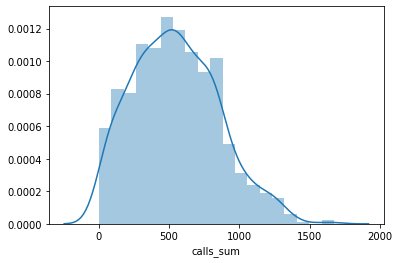

In [42]:
mean_calls_per_person_ultra = user_ultra_income.groupby('user_id')['calls_sum'].mean()
print('Среднее количество минут:', mean_calls_per_person_ultra.mean().round()) 

sns.distplot(user_ultra_income['calls_sum'])

varianc_calls_ultra = np.var(user_ultra_income['calls_sum'])
print('Дисперсия равна:', varianc_calls_ultra.round(), 'минут')

st_deviation_calls_ultra = np.std(user_ultra_income['calls_sum'])
print('Стандартное отклонение равно:', st_deviation_calls_ultra.round(), 'минут')

- Сообщения

Среднее количество cообщений: 54.0
Дисперсия равна: 2169.0 cообщений
Стандартное отклонение равно: 47.0 cообщений


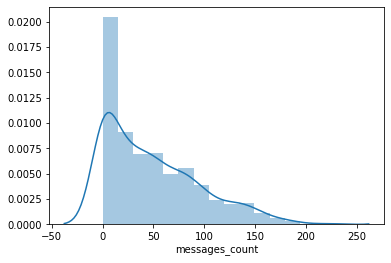

In [43]:
mean_messages_per_person_ultra = user_ultra_income.groupby('user_id')['messages_count'].mean()
print('Среднее количество cообщений:', mean_messages_per_person_ultra.mean().round()) 

sns.distplot(user_ultra_income['messages_count'])
varianc_messages_ultra = np.var(user_ultra_income['messages_count'])
print('Дисперсия равна:', varianc_messages_ultra.round(), 'cообщений')

st_deviation_messages_ultra = np.std(user_ultra_income['messages_count'])
print('Стандартное отклонение равно:', st_deviation_messages_ultra.round(), 'cообщений')

- Количество трафика

Среднее количество трафика: 19557.0 мегабайт
Дисперсия равна: 102650986.0 мегабайт
Стандартное отклонение равно: 10132.0 мегабайт


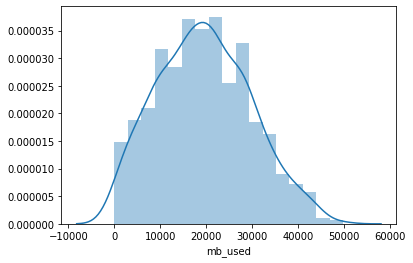

In [45]:
mean_traffic_per_person_ultra = user_ultra_income.groupby('user_id')['mb_used'].mean()
print('Среднее количество трафика:', mean_traffic_per_person_ultra.mean().round(), 'мегабайт') 

sns.distplot(user_ultra_income['mb_used'])

varianc_traffi_ultra = np.var(user_ultra_income['mb_used'])
print('Дисперсия равна:', varianc_traffi_ultra.round(), 'мегабайт')

st_deviation_traffi_ultra = np.std(user_ultra_income['mb_used'])
print('Стандартное отклонение равно:', st_deviation_traffi_ultra.round(), 'мегабайт')

#### Для тарифа смарт:

- Минуты

Среднее количество минут: 420.0
Дисперсия равна: 36203.0 минут
Стандартное отклонение равно: 190.0 минут


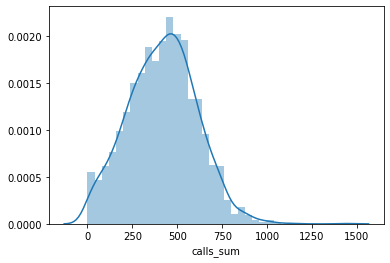

In [46]:
mean_calls_per_person_smart = user_smart_income.groupby('user_id')['calls_sum'].mean()
print('Среднее количество минут:', mean_calls_per_person_smart.mean().round()) 

sns.distplot(user_smart_income['calls_sum'])

varianc_calls_smart = np.var(user_smart_income['calls_sum'])
print('Дисперсия равна:', varianc_calls_smart.round(), 'минут')

st_deviation_calls_smart = np.std(user_smart_income['calls_sum'])
print('Стандартное отклонение равно:', st_deviation_calls_smart.round(), 'минут')

- Сообщения

Среднее количество cообщений: 32.0
Дисперсия равна: 796.0 cообщений
Стандартное отклонение равно: 28.0 cообщений


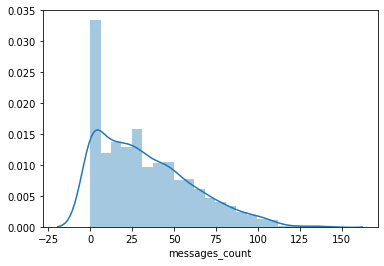

In [47]:
mean_messages_per_person_smart = user_smart_income.groupby('user_id')['messages_count'].mean()
print('Среднее количество cообщений:', mean_messages_per_person_smart.mean().round()) 

sns.distplot(user_smart_income['messages_count'])

varianc_messages_smart = np.var(user_smart_income['messages_count'])
print('Дисперсия равна:', varianc_messages_smart.round(), 'cообщений')

st_deviation_messages_smart = np.std(user_smart_income['messages_count'])
print('Стандартное отклонение равно:', st_deviation_messages_smart.round(), 'cообщений')

- Количество трафика

Среднее количество трафика: 16201.0 мегабайт
Дисперсия равна: 34530413.0 мегабайт
Стандартное отклонение равно: 5876.0 мегабайт


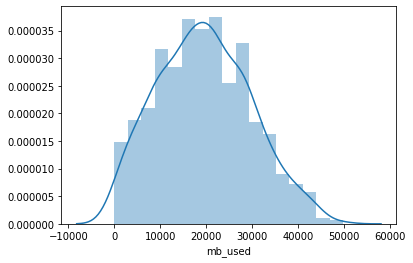

In [48]:
mean_traffic_per_person_smart = user_smart_income.groupby('user_id')['mb_used'].mean()
print('Среднее количество трафика:', mean_traffic_per_person_smart.mean().round(), 'мегабайт') 

sns.distplot(user_ultra_income['mb_used'])

varianc_traffi_smart = np.var(user_smart_income['mb_used'])
print('Дисперсия равна:', varianc_traffi_smart.round(), 'мегабайт')

st_deviation_traffi_smart = np.std(user_smart_income['mb_used'])
print('Стандартное отклонение равно:', st_deviation_traffi_smart.round(), 'мегабайт')

### Вывод

Для пользовтелей каждого тарифа посчитаны сренднее значение и стандартное отклонение для звонков, сообщений и трафика.

1) Графики звонков являются скошенными влево. Из этого следует, что большей части пользователей в тарифе "Смарт" и 100% прользоветелей в тарифе "Ультра" хватает включенного в тариф количества минут. 

2) Аналогичная ситуация с смс сообщениями. Подовляющему большенству пользователей хватает, включенного в тариф, количества. Так же из графиков видно, что смс не пользуются популярностью, так как среднее количество сообщений около 35 вза месяц. Скорее всего это связано с ростом популярности разлиных мессенджеров (Telegram, Whats App) 

3) С трафиком другая ситуация. Хотя графики тоже скошены влево, это не так сильно выражено, как на графиках звонков. На графике для тарифа "Ультра" видно, что большей части пользовтелей хватает включенного количества трафика. Тогда как в тарифе "Смарт" наоборот, большинство превышает включенный лимит. Это не удивительно, ведь среднее количество у тарифа "Ультра" всего на 3 гб  больше, а лимит больше на 15 гб.

## Шаг 5:


### Проверка гипотез.

Нулевая гипотеза (н0) №1:
Средняя выручка пользователей тарифа "Ультра" равна средней выручке пользоветелей тарифа "Смарт"

Альтернативная гипотиза (н1) №1: 
Средняя выручка пользователей тарифа "Ультра" не равна средней выручке пользоветелей арифа "Смарт"


In [30]:
alpha = 0.05

ultra_rev = user_ultra_income.groupby('user_id')['revenue'].mean().round()
smart_rev = user_smart_income.groupby('user_id')['revenue'].mean().round()

results = st.ttest_ind(ultra_rev,
                       smart_rev,
                       equal_var = False)
print('p-значение:', results.pvalue)



if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.537991394104462e-112
Отвергаем нулевую гипотезу


Так как p-значение намного меньше значения alpha, мы отвергаем нулевую гипотезу (н0) №1

Нулевая гипотеза (н0) №2:
Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

Альтернативная гипотиза (н1) №2: 
Средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов.

In [31]:
moscow_users_ultra = (user_ultra_income.merge(users_data, on='user_id', how='left')  
                      .query('city == "Москва"')
                      .groupby('user_id')['revenue']
                      .mean()
                      .round()
                     )
# вычисляем среднюю выручку для пользователей тарифа "ультра" из Москвы

moscow_users_smart = (user_smart_income.merge(users_data, on='user_id', how='left')
                      .query('city == "Москва"')
                      .groupby('user_id')['revenue']
                      .mean()
                      .round()
                     )
# вычисляем среднюю выручку для пользователей тарифа "ультра" из регионов

moscow_users = moscow_users_smart.append(moscow_users_ultra)
# присоединяем пользователей тарифа "Ультра" к пользователям тарифа "Смарт" и получаем список средней выручки для пользователей
# из Москвы



# аналогично находим составляем список средней выручки для пользователей из регионов

regions_users_ultra = (user_ultra_income.merge(users_data, on='user_id', how='left')
                      .query('city != "Москва"')
                      .groupby('user_id')['revenue']
                      .mean()
                      .round()
                     )

regions_users_smart = (user_smart_income.merge(users_data, on='user_id', how='left')
                      .query('city != "Москва"')
                      .groupby('user_id')['revenue']
                      .mean()
                      .round()
                     )

regions_users = regions_users_smart.append(regions_users_ultra)

In [32]:
alpha = 0.05

moscow = moscow_users
regions = regions_users

results = st.ttest_ind(moscow,
                       regions,
                       equal_var = False)
print('p-значение:', results.pvalue)



if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9342786025021413
Не получилось отвергнуть нулевую гипотезу


Так как p-значение больше значения alpha, мы не отвергаем нулевую гипотизу (н0) №2

### Вывод

1) Проведя ttest для двух генральных совокупностей "Средняя выручка пользователей тарифа "Смарт"" и "Средняя выручка пользователей тарифа "Ультра"", получили p-значение меньше порогового значения alpha. На этом основании отвергли нулевую теорнию №1. Так как за нулевую теорию приняли равентсво выручки для двух тарифов, можем утверждать, что выручка тарифа "ультра" не равна выручке тарифа "Смарт". С большой вероятностью у тарифа "Ультра" помесечная выручка для пользователя выше, чем у тарифа "Смарт"


2) Проведя ttest для двух генральных совокупностей "Средняя выручка пользователей из Москвы" и "Средняя выручка пользователей из регионов", получили p-значение больше порогового значения alpha. Исходя из этого мы не отвергаем нулевую теорию (н0) №2. 
    То есть, помесечная выручка у пользователей из регионов такая же, как у пользователей из Москвы. 
   

## Итоговый вывод.


Проведя анализ данных, выяснили:

- Среднее колчество минут, сообщений и трафика которые пользователи тратят в месяц.
    Исходя из этих значений, в дальнейшем, можно будет скорректировать количество включенных в тариф минут, сообщений, гигобайт. Например, для тарифа Смарт можно уменьшить количество включенных сообщений. Большинство пользователе не заметит разницы, так как они отправляют не много сообщений. Но для остальных это может стать стимулом перейт на тариф Ультра или подключить дополнительный пакет.



- Помесечную выручку для пользователей каждого тарифа. 
    Предполагаю, что у тарифа "Ультра" помесечная выручка для пользователя выше, чем у тарифа "Смарт". Но прибыль у двух тарифов примерно равна, так как пользователей тарифа Смарт больше и они чаще превышают включенные в тарифный пакет значения.
    
    
В качестве рекомендации, я бы посоветовал обратить внимание на тариф Смарт, так как в перспективе он более выгодный, потому что пользователи чаще превыщают включенные в тарифный пакет значения. В то время, как пользователи тарифа Ультра очень редко привышают тарифный пакет и в большинстве платят только абонентскую плату.